# Machine Learning Models

The goal of this workbook is to compare different machine learning models on our dataset and compare their results. We are looking to see which models perform best on our dataset and which can most accurately be used to predict new data.

In this workbook we will load our cleaned csv from our ETL process, then compare the following models:
    - Logistic Regression
    - K Nearest Neighbor
    - Random Forest
    - Neural Network
    
After analyizing each of these models to see which is the best predictor, we will use a <b>Correlation Matrix</b> in order to see which of the input factors from our data has the best predictive power. This is an additional path our group wanted to go down to gain more insight into our data.
    
` While there are plenty of other machine learning models we could have explored, these are the handful that our team was most interested in experimenting with. In addition, our team selected these models as we believe they have a high likelyhood to be effective considering the nature of our dataset and predictive goals. `

In [1]:
# Import General Dependencies for this Workbook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import os
from sklearn import preprocessing

In [2]:
# Set file path to the cleaned data csv from data cleanup process
file = "data.csv"

# Read to a df
data_df = pd.read_csv(file)
data_df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#print(data_df)
#print(data_df.dtypes)

## Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.

In [4]:
# Logistic Regression Specific Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [5]:
# The data contains the "income", stating rather an individual earns less than $50k or more than $50k. 
# Removing the "income" from the input set in order to not provide the model with the correct answer. 

# Assign X (data) and y (target)
X = data_df.drop("income", axis=1)
y = data_df["income"]
print(X.shape, y.shape)

(32561, 14) (32561,)


In [6]:
X = pd.get_dummies(X)

In [7]:
# Split the data into a training (75% of values) and testing (25% of values) split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Generate the Logistic Regression Model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [9]:
# Fit the model
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Train the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.793980343980344
Testing Data Score: 0.8073946689595872


### Predict with new data

In [11]:
# Predict the class examples
predictions = classifier.predict(X_test)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [' <=50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']


In [12]:
# Predict into a df
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
9646,<=50K,<=50K
709,<=50K,<=50K
7385,>50K,>50K
16671,<=50K,<=50K
21932,<=50K,<=50K
...,...,...
31540,<=50K,<=50K
18566,<=50K,>50K
13141,<=50K,<=50K
14286,<=50K,<=50K


In [13]:
# Logistic Regression variable for charts
logistic_accuracy = classifier.score(X_test, y_test)

## K Nearest Neighbors (KNN) Model

In [14]:
# KNN Specific Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [15]:
# Take a look at the original dataset
data_df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
# setting "y" to income 
y = data_df["income"]
target_names = ["negative", "positive"]

In [17]:
# dropping "income" from the data as this has the correct answer 
X = data_df.drop("income", axis=1)
X.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [18]:
X = pd.get_dummies(X)

In [19]:
# Run the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [21]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.795
k: 3, Train/Test Score: 0.895/0.816
k: 5, Train/Test Score: 0.875/0.825
k: 7, Train/Test Score: 0.863/0.829
k: 9, Train/Test Score: 0.857/0.831
k: 11, Train/Test Score: 0.853/0.832
k: 13, Train/Test Score: 0.850/0.833
k: 15, Train/Test Score: 0.848/0.831
k: 17, Train/Test Score: 0.846/0.831
k: 19, Train/Test Score: 0.845/0.829


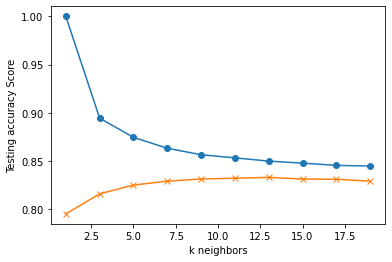

In [22]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [23]:
# Note that K: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.833


In [24]:
# K Nearest Neighbors variable for charts
knn_accuracy = knn.score(X_test_scaled, y_test)

## Random Forest Model

In [25]:
# Random Forest Specific Imports
from sklearn.ensemble import RandomForestClassifier


In [26]:
# Check the data 
data_df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
target = data_df["income"]
target_names= [">=50","<=50"]
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [28]:
#labelencode the target
labelencoder = preprocessing.LabelEncoder()
target_binary = labelencoder.fit_transform(target)
print (target_binary)


[0 0 0 ... 0 0 1]


In [29]:
data_df = data_df.drop("income", axis=1)

In [30]:
feature_names = data_df.columns
data_df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [31]:
data_binary_encoded = pd.get_dummies(data_df)
data_binary_encoded.head()

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#import train_test_Split
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, target, random_state=42)
X_train.columns.to_list()


['age',
 'fnlwgt',
 'education_number',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Divorced',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_

In [33]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8588625475985752

As we can see the RandomForestClassifier has about 86% of accuracy. This is a very good indicator of a good model. On the next steps, we will prioritize the features based on the importance in order to investigate which feature was the greatest indicator of income that is above 50,000 dollars or below 50,000 dollars. 

In [34]:
featuresPriority = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
featuresPriority

[(0.15782547219788196, 'workclass'),
 (0.1506041718985788, 'age'),
 (0.09159786314313058, 'education'),
 (0.08344510215696375, 'marital_status'),
 (0.0647696085571314, 'fnlwgt'),
 (0.029115244988115407, 'education_number'),
 (0.01074764476189561, 'capital_gain'),
 (0.008485284935521828, 'hours_per_week'),
 (0.006978750013711894, 'capital_loss'),
 (0.0059702905482090386, 'race'),
 (0.005797306444172381, 'relationship'),
 (0.004635989252177413, 'native_country'),
 (0.001992213479596954, 'occupation'),
 (3.0243310704918304e-06, 'sex')]

In [35]:

featuresPriority_df= pd.DataFrame(featuresPriority)
featuresPriority_df

,0,1
0,0.157825,workclass
1,0.150604,age
2,0.091598,education
3,0.083445,marital_status
4,0.064770,fnlwgt
5,0.029115,education_number
6,0.010748,capital_gain
7,0.008485,hours_per_week
8,0.006979,capital_loss
9,0.005970,race


In [36]:
featuresPriority_df = featuresPriority_df.rename(columns={0:'Accuracy %' , 1:'Income Determinants'})
featuresPriority_df

,Accuracy %,Income Determinants
0,0.157825,workclass
1,0.150604,age
2,0.091598,education
3,0.083445,marital_status
4,0.064770,fnlwgt
5,0.029115,education_number
6,0.010748,capital_gain
7,0.008485,hours_per_week
8,0.006979,capital_loss
9,0.005970,race


In [37]:
# import plotly.express as px

# fig = px.bar(featuresPriority_df, x = 'Income Determinants', y ='Accuracy %',  color =["red", "goldenrod",'#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921','blue','red'], labels={'Income Determinants', 'Accuracy %'}, title = "Factors That Contribute To Income Greater Than Or Equal To 50,000 Dollars Per Year")

# fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},showlegend= False)
# fig.show()

Now we will run the same, but just look at the top determinants to see if the model performs any different

In [38]:
data_binary_encoded.head()

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data_df = data_df.drop(["occupation","sex","native_country","relationship"], axis=1)

In [40]:
data_binary_encoded_2 = pd.get_dummies(data_df)
data_binary_encoded_2.head()

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded_2, target, random_state=42)
y_train[0]

' <=50K'

In [42]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.8446136838226262

In [43]:
# Load this to a new variable
random_forest_accuracy = rf.score(X_test, y_test)
random_forest_accuracy 

0.8446136838226262

## Neural Network Model

In [44]:
# Neural Network Specific Imports
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages

In [45]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(42)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, target, random_state=42)
X_train.columns.to_list()

['age',
 'fnlwgt',
 'education_number',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Divorced',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_

In [47]:
# Step #1 label-encode the dataset
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [48]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

In [49]:
X_scaler = StandardScaler().fit(X_train)

In [50]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [51]:
X_train_scaled.shape[1]

108

In [52]:
#data_binary_encoded
model = Sequential()

In [53]:
number_inputs = X_train_scaled.shape[1]
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [54]:
y_train_categorical.shape[1]   

2

In [55]:
X_train_scaled

array([[ 0.76270329,  0.03505025, -0.42318329, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       [-0.85041534, -0.52773408, -0.42318329, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       [ 0.39608542, -0.18721601, -1.20001078, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       ...,
       [-1.51032751,  0.25286853, -1.20001078, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       [ 0.83602687, -1.28703767, -0.42318329, ...,  0.3446706 ,
        -0.04921284, -0.022173  ],
       [-0.33715032, -0.58952117,  1.13047168, ...,  0.3446706 ,
        -0.04921284, -0.022173  ]])

In [56]:
number_classes =  y_train_categorical.shape[1]
model.add(Dense(units=number_classes, activation='softmax'))

In [57]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
24420/24420 - 1s - loss: 0.4304 - acc: 0.7968
Epoch 2/100
24420/24420 - 0s - loss: 0.3424 - acc: 0.8398
Epoch 3/100
24420/24420 - 0s - loss: 0.3302 - acc: 0.8472
Epoch 4/100
24420/24420 - 0s - loss: 0.3232 - acc: 0.8502
Epoch 5/100
24420/24420 - 0s - loss: 0.3191 - acc: 0.8501
Epoch 6/100
24420/24420 - 1s - loss: 0.3169 - acc: 0.8523
Epoch 7/100
24420/24420 - 0s - loss: 0.3152 - acc: 0.8530
Epoch 8/100
24420/24420 - 0s - loss: 0.3138 - acc: 0.8540
Epoch 9/100
24420/24420 - 0s - loss: 0.3129 - acc: 0.8545
Epoch 10/100
24420/24420 - 0s - loss: 0.3122 - acc: 0.8545
Epoch 11/100
24420/24420 - 0s - loss: 0.3112 - acc: 0.8551
Epoch 12/100
24420/24420 - 0s - loss: 0.3110 - acc: 0.8541
Epoch 13/100
24420/24420 - 0s - loss: 0.3105 - acc: 0.8561
Epoch 14/100
24420/24420 - 0s - loss: 0.3100 - acc: 0.8567
Epoch 15/100
24420/24420 - 0s - loss: 0.3096 - acc: 0.8562
Epoch 16/100
24420/24420 - 0s - loss: 0.3092 - acc: 0.8569
Epoch 17/100
24420/24420 - 0s - loss: 0.3088 - acc: 0.8570
Epoch 

In [59]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate( X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8141/8141 - 0s - loss: 0.3109 - acc: 0.8605
Loss: 0.31090426774476554, Accuracy: 0.8604593873023987


In [60]:
# Neural Network Model variable for charts
neaural_network_accuracy = model.evaluate( X_test_scaled, y_test_categorical)
print(neaural_network_accuracy[1])

8141/8141 [==============================] - 0s 10us/sample - loss: 0.3109 - acc: 0.8605
0.8604594


In [61]:
nnetwork_accuracy = (neaural_network_accuracy[1])
print(nnetwork_accuracy)

0.8604594


# Pass in output from models for chart

In [62]:
# Print out all of the models accuracy scores
print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(f"K Nearest Neighbor Accuracy: {knn_accuracy}")
print(f"Random Forest Accuracy: {random_forest_accuracy}")
print(f"Neural Network Accuracy: {nnetwork_accuracy}")


Logistic Regression Accuracy: 0.8073946689595872
K Nearest Neighbor Accuracy: 0.8331900257953568
Random Forest Accuracy: 0.8446136838226262
Neural Network Accuracy: 0.8604593873023987


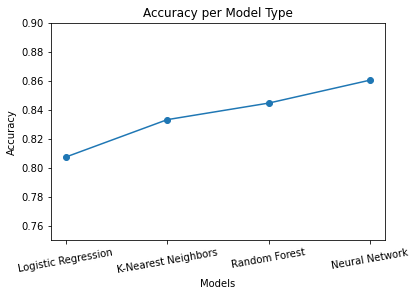

In [63]:
# line chart 
x_values = ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Neural Network"]
y_values = [logistic_accuracy, knn_accuracy, random_forest_accuracy, nnetwork_accuracy]
plt.xticks(rotation=10)
plt.plot(x_values,y_values, marker="o")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy per Model Type")
plt.ylim(.75,.9)

plt.savefig("../css/Images/model_comparison.png")

plt.show()

## Correlation Matrix

In [64]:
data_df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,race,capital_gain,capital_loss,hours_per_week
0,39,State-gov,77516,Bachelors,13,Never-married,White,2174,0,40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,White,0,0,13
2,38,Private,215646,HS-grad,9,Divorced,White,0,0,40
3,53,Private,234721,11th,7,Married-civ-spouse,Black,0,0,40
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Black,0,0,40


In [66]:
# Focus in on inputs more likely to cause an effect
# Ask DOM about this

strong_inputs_df = data_df[["workclass","age", "education", "marital_status", "fnlwgt"]]
strong_inputs_df

,workclass,age,education,marital_status,fnlwgt
0,State-gov,39,Bachelors,Never-married,77516
1,Self-emp-not-inc,50,Bachelors,Married-civ-spouse,83311
2,Private,38,HS-grad,Divorced,215646
3,Private,53,11th,Married-civ-spouse,234721
4,Private,28,Bachelors,Married-civ-spouse,338409
...,...,...,...,...,...
32556,Private,27,Assoc-acdm,Married-civ-spouse,257302
32557,Private,40,HS-grad,Married-civ-spouse,154374
32558,Private,58,HS-grad,Widowed,151910
32559,Private,22,HS-grad,Never-married,201490


In [67]:
# Create the correlation on the data frame
# corrMatrix = data_df.corr()
corrMatrix = strong_inputs_df.corr()
corrMatrix

,age,fnlwgt
age,1.000000,-0.076646
fnlwgt,-0.076646,1.000000


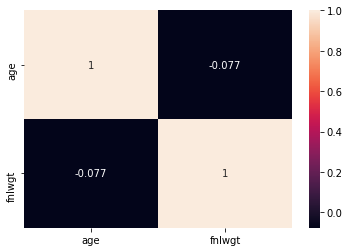

In [68]:
# Use Seaborn and Matplot to plot the correlation matrix
sn.heatmap(corrMatrix, annot=True)

plt.show()